<a href="https://colab.research.google.com/github/DammuNikhitha/AI-ML-Internship-Task-12/blob/main/TASK12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 12: KMeans – Customer Segmentation**



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## Step 1: Load the dataset and inspect columns

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Step 2: Drop CustomerID column and select features for clustering
We use:
- Annual Income (k$)
- Spending Score (1-100)

In [4]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Step 3: Apply StandardScaler for normalization

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 4: Apply Elbow Method to find optimal number of clusters


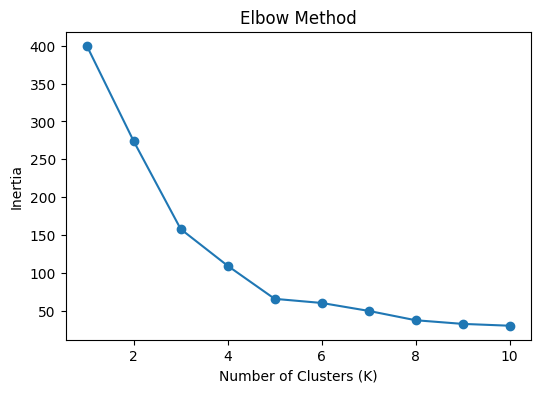

In [6]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.show()


## Step 5: Train KMeans model with optimal K value
From elbow plot, optimal K = 5


In [7]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


## Step 6: Visualize clusters using scatter plot


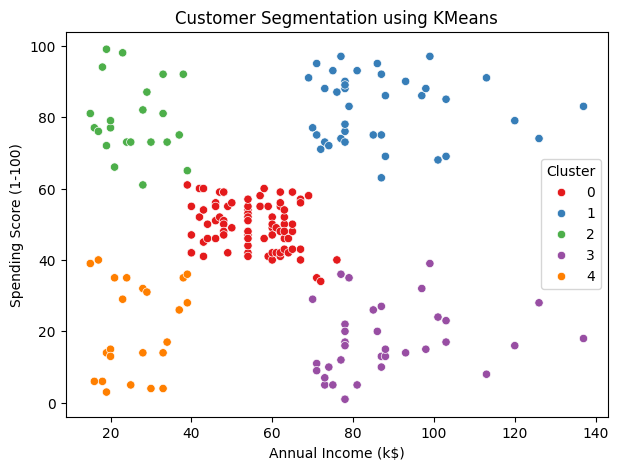

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', data=df, palette='Set1')
plt.title("Customer Segmentation using KMeans")
plt.show()


## Step 7: Save segmented dataset as CSV file


In [9]:
df.to_csv("Segmented_Customers.csv", index=False)
print("Segmented dataset saved successfully.")


Segmented dataset saved successfully.


## Step 8: Interpretation of Clusters

Cluster 0: High Income, High Spending – Premium Customers  
Cluster 1: Low Income, Low Spending – Budget Customers  
Cluster 2: High Income, Low Spending – Careful Customers  
Cluster 3: Low Income, High Spending – Impulsive Customers  
Cluster 4: Medium Income, Medium Spending – Average Customers  

These clusters help businesses target customers with personalized marketing strategies.
